In [1]:
import qiskit

creg = qiskit.ClassicalRegister(2)
qreg = qiskit.QuantumRegister(5)

circuit = qiskit.QuantumCircuit(qreg,creg)

circuit.draw()


q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
q0_4: 
      
c0: 2/

In [2]:
#STAGE 1
circuit.h(0)
circuit.h(1)
circuit.h(4)
circuit.z(4)
#circuit.x(3)

#Oracle making "(x and y) and y" function
#STAGE 2
circuit.x(0)
circuit.x(1)
circuit.ccx(0,1,2)
circuit.x(0)
circuit.x(1)

#Stage 3
#circuit.x(1)
circuit.cx(1,3)
#circuit.x(1)

#stage 4
circuit.x(2)
circuit.ccx(2,3,4)
circuit.x(2)

#Stage 5
#circuit.x(1)
circuit.cx(1,3)
#circuit.x(1)

#STAGE 6
circuit.x(0)
circuit.x(1)
circuit.ccx(0,1,2)
circuit.x(0)
circuit.x(1)

#Diffusion operator
circuit.h(0)
circuit.h(1)
circuit.x(0)
circuit.x(1)
circuit.ccx(0,1,4)
circuit.x(0)
circuit.x(1)
circuit.h(0)
circuit.h(1)



circuit.draw()

┌───┐┌───┐     ┌───┐┌───┐                         ┌───┐┌───┐┌───┐     »
q0_0: ┤ H ├┤ X ├──■──┤ X ├┤ X ├──────────────────────■──┤ X ├┤ H ├┤ X ├──■──»
      ├───┤├───┤  │  ├───┤└───┘               ┌───┐  │  ├───┤├───┤├───┤  │  »
q0_1: ┤ H ├┤ X ├──■──┤ X ├──■──────────────■──┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──»
      └───┘└───┘┌─┴─┐├───┤  │       ┌───┐  │  └───┘┌─┴─┐└───┘└───┘└───┘  │  »
q0_2: ──────────┤ X ├┤ X ├──┼────■──┤ X ├──┼───────┤ X ├─────────────────┼──»
                └───┘└───┘┌─┴─┐  │  └───┘┌─┴─┐     └───┘                 │  »
q0_3: ────────────────────┤ X ├──■───────┤ X ├───────────────────────────┼──»
      ┌───┐┌───┐          └───┘┌─┴─┐     └───┘                         ┌─┴─┐»
q0_4: ┤ H ├┤ Z ├───────────────┤ X ├───────────────────────────────────┤ X ├»
      └───┘└───┘               └───┘                                   └───┘»
c0: 2/══════════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌───┐┌───┐
«q0_0: ┤ X ├┤ H ├
«      ├───┤├───┤
«q0_1: ┤ X ├┤ H ├
«      └───┘└───┘
«q0_2: ──────────
«                
«q0_3: ──────────
«                
«q0_4: ──────────
«                
«c0: 2/══════════
«

In [3]:
qiskit.quantum_info.Statevector.from_instruction(circuit)

Statevector([ 0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
             -0.35355339+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j, -0.35355339+0.j, -0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2, 2, 2))


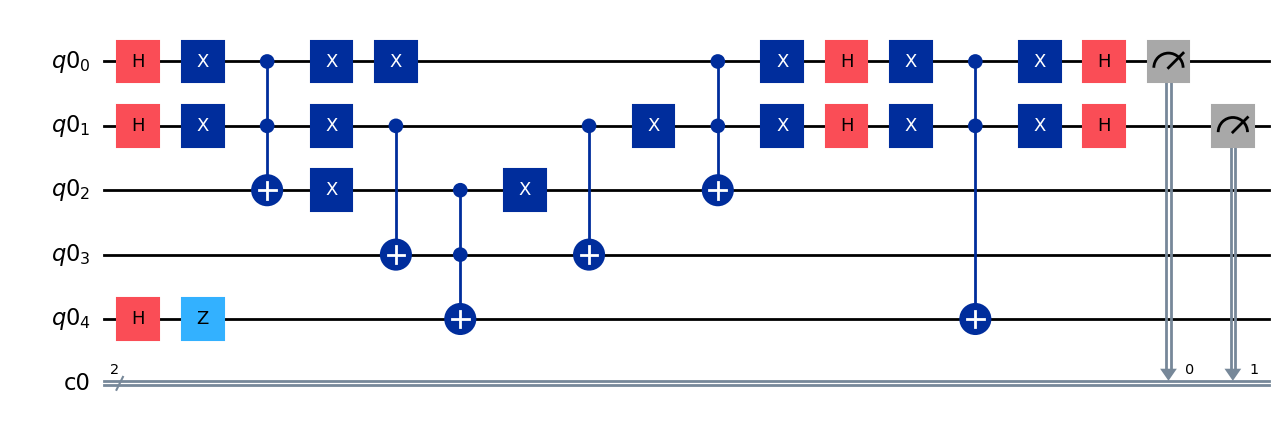

In [4]:

circuit.measure([0,1],[0,1])
circuit.draw('mpl')

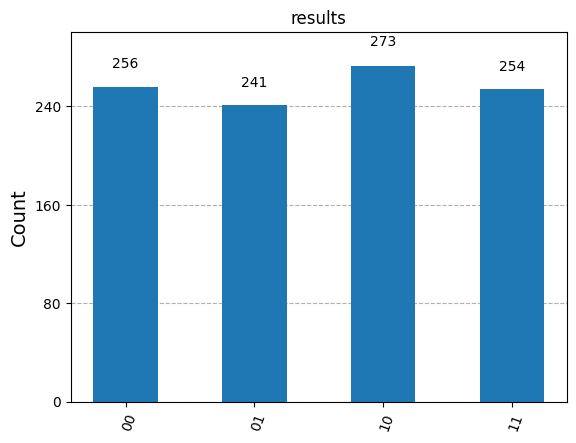

In [5]:

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
simulator = AerSimulator()
circ = transpile(circuit, simulator)
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='results')

#from qiskit_aer.primitives import Estimator
#estimator=Estimator()
#job=estimator.run(circuit,qreg)
#sim = qiskit.Acr.get_backend(qasm_simulator)
#job.qiskit.execute(circuit,sim,shots=1024)
#qiskit.visualization.plot_histogram(qreg,creg)